In [37]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)

In [15]:
# load the dataset
# n ; # of features
# x_train contain : house size, # bedroom, # floors, age 
X_train = np.array([[2104, 5, 1, 45], 
                    [1416, 3, 2, 40], 
                    [852, 2, 1, 35]])

# y_train contains : price 
y_train = np.array([460, 232, 178])

X_features = ['size(sqft)','bedrooms','floors','age']

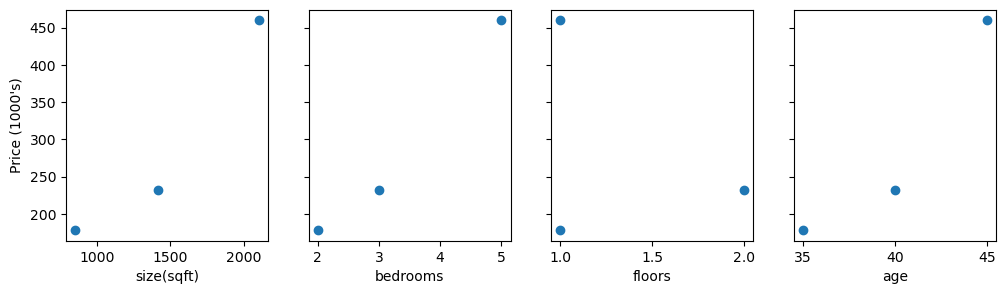

In [21]:
fig,ax=plt.subplots(1, 4, figsize=(12, 3), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Price (1000's)")
plt.show()

In [23]:
def compute_cost(X, y, w, b): 
    """
    compute cost
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      cost (scalar): cost
    """
    # size of first element 
    m = X.shape[0]
    
    cost = 0.0
    
    for i in range(m):   
        
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        
        cost += (f_wb_i - y[i])**2             #scalar
        
    cost = cost / (2 * m)                      #scalar    
    return cost

In [45]:
def compute_gradient(X, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters  
      b (scalar)       : model parameter
      
    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape           #(number of examples, number of features)
    
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]   
        
        for j in range(n):                         
            dj_dw[j] += err * X[i, j] 
            
        dj_db += err        
        
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
        
    return dj_db, dj_dw

In [43]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters  
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,)) : Updated values of parameters 
      b (scalar)       : Updated value of parameter 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [112]:
# #bias
# b_init = 785.1811367994083

# #weights
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

# initialize parameters

# array of zeros w the same shape as w_init
initial_w = np.zeros_like(w_init)
initial_b = 0.

In [116]:
# some gradient descent settings
iterations = 10
alpha = 9.9e-7

# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost 91474.10   
Iteration    1: Cost 169486.78   
Iteration    2: Cost 314542.65   
Iteration    3: Cost 584257.82   
Iteration    4: Cost 1085763.02   
Iteration    5: Cost 2018255.84   
Iteration    6: Cost 3752121.88   
Iteration    7: Cost 6976051.77   
Iteration    8: Cost 12970588.59   
Iteration    9: Cost 24116758.97   
b,w found by gradient descent: -0.00,[-4.29e+00 -9.81e-03 -3.70e-03 -1.10e-01] 


the learning rate is too high. The solution does not converge. Cost is increasing rather than decreasing.

In [118]:
# some gradient descent settings
iterations = 10
alpha = 9e-7

# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost 65119.26   
Iteration    1: Cost 85706.09   
Iteration    2: Cost 112871.69   
Iteration    3: Cost 148718.37   
Iteration    4: Cost 196020.26   
Iteration    5: Cost 258438.03   
Iteration    6: Cost 340802.11   
Iteration    7: Cost 449486.59   
Iteration    8: Cost 592902.43   
Iteration    9: Cost 782148.45   
b,w found by gradient descent: -0.00,[-0.61 -0.   -0.   -0.02] 


In [114]:
# some gradient descent settings
iterations = 10
alpha = 1e-7

# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost 28989.11   
Iteration    1: Cost 17092.49   
Iteration    2: Cost 10198.32   
Iteration    3: Cost  6203.10   
Iteration    4: Cost  3887.85   
Iteration    5: Cost  2546.15   
Iteration    6: Cost  1768.62   
Iteration    7: Cost  1318.03   
Iteration    8: Cost  1056.92   
Iteration    9: Cost   905.60   
b,w found by gradient descent: 0.00,[1.89e-01 4.41e-04 1.30e-04 4.64e-03] 


### z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$


In [ ]:
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 